# Задача №1. Безудержный анализ

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Чтобы все столбцы показывались при выводе таблиц
pd.set_option('display.max_columns', None)

# Отключим нерелевантные предупреждения padnas
pd.options.mode.chained_assignment = None

# Полезная функция для отладки
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [348]:
pokemon = pd.read_csv('pokemon.csv')
abilities = pd.read_csv('abilities.csv')
egg_groups = pd.read_csv('egg_groups.csv')

Для начала посмотрим на данные.

In [350]:
pokemon.head()

,id,identifier,name,name_phonetic,species,name_jp,name_jp_romaji,species_jp,generation_id,ndex,kdex,jdex,jdex_old,hdex,sdex,udex,type1_id,type2_id,ability1_id,ability2_id,abilitydream_id,evolution_parent_pokemon_id,evolution_method_id,evolution_parameter,height,weight,gender_rate,catch_rate,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
0,1,bulbasaur,Bulbasaur,Bulbasaur,Seed,フシギダネ,Fushigidane,たね,1,1,1.0,231.0,226.0,NaN,NaN,NaN,12,4.0,65,NaN,34.0,NaN,NaN,NaN,7,69,1,45,64,70,1,7.0,0,NaN,20,1059860,1,1.0
1,2,ivysaur,Ivysaur,Ivysaur,Seed,フシギソウ,Fushigisou,たね,1,2,2.0,232.0,227.0,NaN,NaN,NaN,12,4.0,65,NaN,34.0,1.0,1.0,16,10,130,1,45,141,70,1,7.0,0,NaN,20,1059860,2,2.0
2,3,venusaur,Venusaur,Veenasore,Seed,フシギバナ,Fushigibana,たね,1,3,3.0,233.0,228.0,NaN,NaN,NaN,12,4.0,65,NaN,34.0,2.0,1.0,32,20,1000,1,45,208,70,1,7.0,0,NaN,20,1059860,3,3.0
3,4,charmander,Charmander,Char-mander,Lizard,ヒトカゲ,Hitokage,とかげ,1,4,4.0,234.0,229.0,NaN,NaN,NaN,10,NaN,66,NaN,94.0,NaN,NaN,NaN,6,85,1,45,65,70,1,14.0,0,NaN,20,1059860,4,4.0
4,5,charmeleon,Charmeleon,Char-meeleon,Flame,リザード,Lizardo,かえん,1,5,5.0,235.0,230.0,NaN,NaN,NaN,10,NaN,66,NaN,94.0,4.0,1.0,16,11,190,1,45,142,70,1,14.0,0,NaN,20,1059860,5,5.0


In [349]:
pokemon.shape

(663, 38)

Итак, у нас 663 покемона и 38 признаков. Сперва удалим японские названия, а также колонки с некоторыми неизвестными индексами, идущими по порядку и на первый взгляд не несущими полезной информации — а потом поищем интересные признаки.

In [329]:
good_columns = [
    c for c in pokemon.columns 
        if c.lower()[-2:] != 'jp' and 
        c.lower()[-3:] != 'dex' and
        c.lower()[-3:] != 'old' and 
        c != 'legacy_id' and 
        c != 'name_jp_romaji'
    ]
pokemon = pokemon[good_columns]
pokemon.head()

,id,identifier,name,name_phonetic,species,generation_id,type1_id,type2_id,ability1_id,ability2_id,abilitydream_id,evolution_parent_pokemon_id,evolution_method_id,evolution_parameter,height,weight,gender_rate,catch_rate,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order
0,1,bulbasaur,Bulbasaur,Bulbasaur,Seed,1,12,4.0,65,NaN,34.0,NaN,NaN,NaN,7,69,1,45,64,70,1,7.0,0,NaN,20,1059860,1
1,2,ivysaur,Ivysaur,Ivysaur,Seed,1,12,4.0,65,NaN,34.0,1.0,1.0,16,10,130,1,45,141,70,1,7.0,0,NaN,20,1059860,2
2,3,venusaur,Venusaur,Veenasore,Seed,1,12,4.0,65,NaN,34.0,2.0,1.0,32,20,1000,1,45,208,70,1,7.0,0,NaN,20,1059860,3
3,4,charmander,Charmander,Char-mander,Lizard,1,10,NaN,66,NaN,94.0,NaN,NaN,NaN,6,85,1,45,65,70,1,14.0,0,NaN,20,1059860,4
4,5,charmeleon,Charmeleon,Char-meeleon,Flame,1,10,NaN,66,NaN,94.0,4.0,1.0,16,11,190,1,45,142,70,1,14.0,0,NaN,20,1059860,5


# Что это за is_baby?

Выглядит интересно — посмотрим, сколько покемонов-детей в выборке.

In [330]:
pokemon[pokemon['is_baby'] == 1].shape[0] / pokemon.shape[0]

0.027149321266968326

Их слишком мало для исследования — всего 2.7% от выборки. Двигаемся дальше.

# Какие виды покемонов бывают?
Изучим этот вопрос — species похож на искомый атрибут.

In [331]:
pokemon['species'].nunique()

475

Уникальных значений species очень много, число приближается к размеру выборки. Попробуем type1_id и type2_id.

In [332]:
print("Distinct type1_id values count =", pokemon['type1_id'].nunique(), ", values:", sorted(pokemon['type1_id'].unique()))
print("Distinct type2_id values count =", pokemon['type2_id'].nunique(), ", values:", sorted(pokemon['type2_id'].unique()))

Distinct type1_id values count = 17 , values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
Distinct type2_id values count = 16 , values: [4.0, nan, 2.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]


Видно, что в type2_id есть пропущенные значения. Посмотрим, сколько их.

In [333]:
pokemon['type2_id'].fillna(-1, inplace = True)
pokemon.groupby('type2_id').size()

type2_id
-1.0     357
 2.0      19
 3.0      83
 4.0      31
 5.0      29
 6.0      14
 7.0       3
 8.0       8
 9.0      20
 10.0     10
 11.0     10
 12.0     15
 13.0      6
 14.0     25
 15.0      9
 16.0     10
 17.0     14
dtype: int64

Видно, что более, чем у половины выборки отсутствует type2_id. Будем использовать в качестве "типа" значение type1_id.

# Сравним размеры и плотность типов покемонов

Посмотрим на распределение веса и роста покемонов по типу.

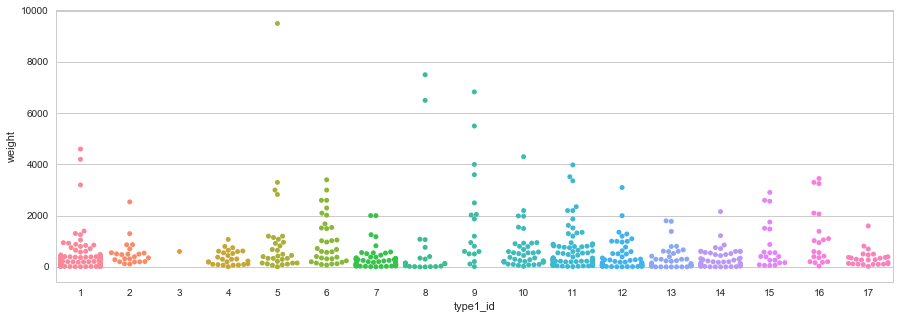

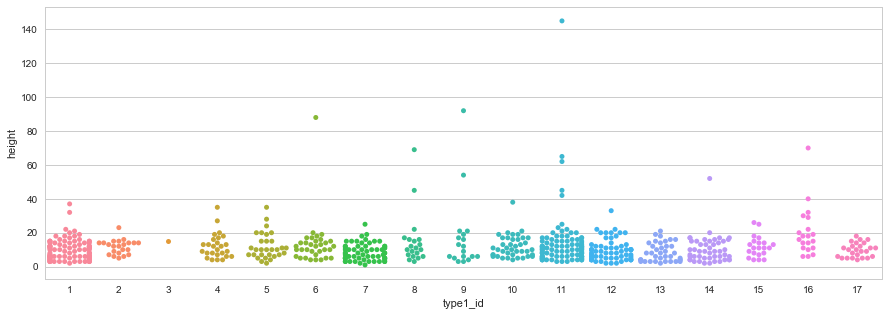

In [334]:
plt.subplots(figsize = (15,5))
sns.swarmplot(x="type1_id", y="weight", data=pokemon)
sns.plt.show()

plt.subplots(figsize = (15,5))
sns.swarmplot(x="type1_id", y = "height", data=pokemon)
sns.plt.show()

Видно, что большая разница в весте и росте между группами отсутствует — большая часть покемонов имеет одинаковые размеры, независимо от группы.

Попробуем теперь сравнить покемонов по **разреженности (величина, обратная плотности)**.

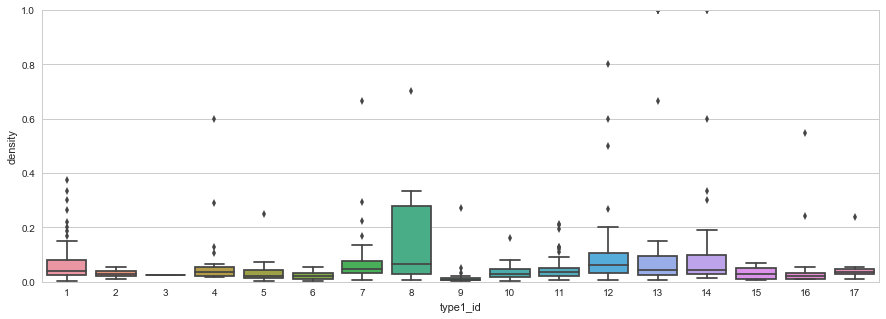

In [335]:
pokemon["density"] = pokemon["height"] / pokemon["weight"] 

plt.subplots(figsize = (15,5))
sns.boxplot(x="type1_id", y="density", data=pokemon)
plt.ylim(0, 1)
sns.plt.show()


Видно, что 8 тип покемонов имеет наименьшую плотность. Посмотрим, как называются покемоны этого типа.

In [336]:
pokemon[pokemon['type1_id'] == 8]['name'].head()

91         Gastly
92        Haunter
93         Gengar
199    Misdreavus
352       Shuppet
Name: name, dtype: object

Небольшой гуглинг показывает, что это привидения. Это логично — привидения большие и воздушные. Двигаемся дальше.

# Какое поколение самое грустное?
Посмотрим, как различается base_happiness у разных поколений.

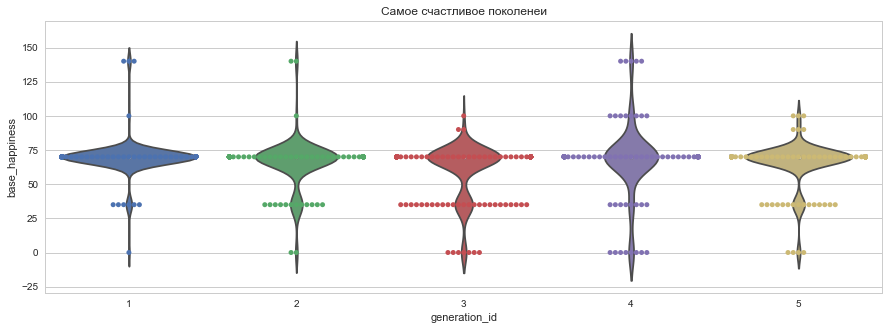

In [337]:
plt.subplots(figsize = (15,5))
plt.title('Самое счастливое поколенеи')
sns.violinplot(x = "generation_id", y = "base_happiness", data = pokemon)
sns.swarmplot(x = "generation_id", y = "base_happiness", data = pokemon)
sns.plt.show()

Видно, что покемоны из **третьего поколения** сильнее других склонны родиться грустными.

# Изучим корреляции численных признаков друг с другом

Сначала уберем из данных все строки и столбцы-идентификаторы, а также ранее введенный столбец density.

In [338]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = pokemon.select_dtypes(include=numerics)

non_id_columns = [c for c in numeric_df.columns if (c.lower()[-2:] != 'id')]
numeric_df = numeric_df[non_id_columns]
del numeric_df['density']

numeric_df.head()

,height,weight,gender_rate,catch_rate,exp_yield,base_happiness,is_baby,hatch_counter,lvl_100_exp,pokemon_order
0,7,69,1,45,64,70,0,20,1059860,1
1,10,130,1,45,141,70,0,20,1059860,2
2,20,1000,1,45,208,70,0,20,1059860,3
3,6,85,1,45,65,70,0,20,1059860,4
4,11,190,1,45,142,70,0,20,1059860,5


Теперь построит матрицу корреляций признаков. Метод — коэффициентов корреляции Спирмена, потому что он покажем наличие **любых зависимостей, не только линейных**.

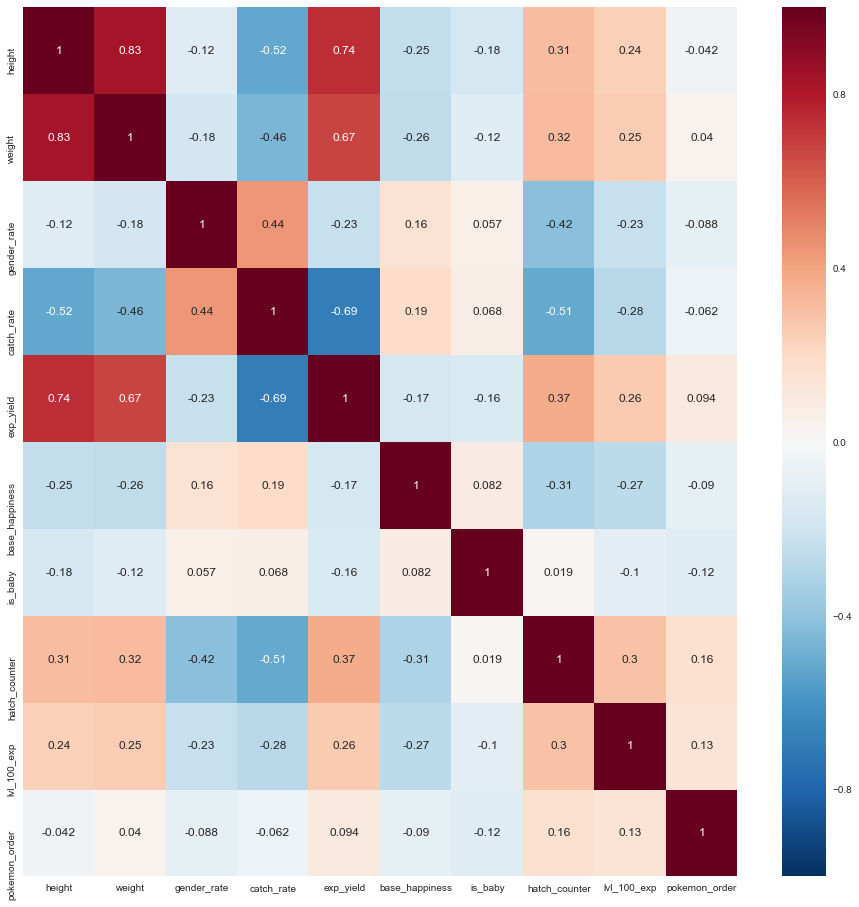

In [339]:
plt.figure(figsize=(16,16))
sns.heatmap(numeric_df.corr(method='spearman'), annot=True)
plt.show()

Здесь видно две средневыраженных корреляции:
* Корреляция веса и роста (это очевидно и неинтересно)
* Корреляция получаемого **опыта с весом и ростом** (а это уже интереснее)
* Обратная корреляция получаемого **опыта с catch_rate** — это логично, чем проще поймать покемона, тем меньше опыта он дает

Исследуем второй пункт подробнее.

# Корреляция роста и exp_yield
Построим диаграмму рассеяния для этих величин.

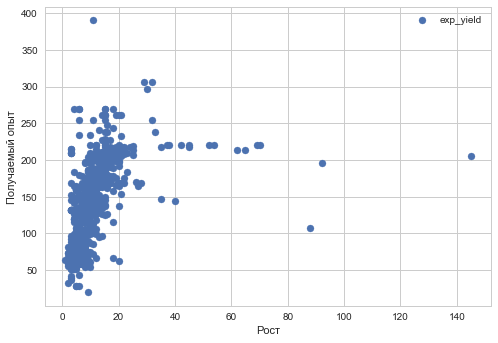

In [340]:
plt.scatter(pokemon['height'], pokemon['exp_yield'])
plt.xlabel("Рост")
plt.ylabel("Получаемый опыт")
plt.legend()
plt.plot()
plt.show()

Корреляция не очень заметна на диаграмме рассеяния. Попробуем заменить шкалы на логарифмические.

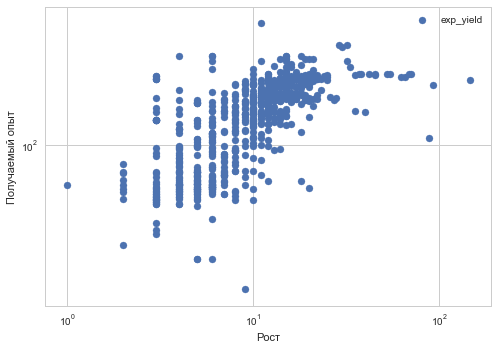

In [341]:
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

plt.scatter(pokemon['height'], pokemon['exp_yield'])
plt.xlabel("Рост")
plt.ylabel("Получаемый опыт")
plt.legend()
plt.plot()
plt.show()

Теперь **экспоненциальную зависимость** между ростом и получаемым опытом видно значительно лучше.

# Просто красивая картинка

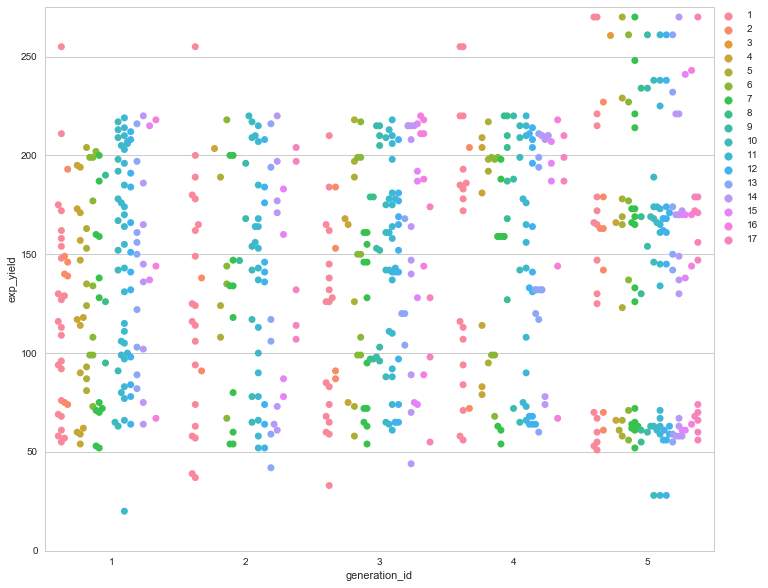

In [342]:
plt.figure(figsize=(12,10))
plt.ylim(0, 275)
sns.swarmplot(x="generation_id", y="exp_yield", data=pokemon, hue="type1_id", split=True, size=7)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);
plt.show()

Отражает связь поколения, прироста опыта и type1_id покемонов. Не несет никакой нагрузки, кроме эстетической.

# Обратим внимание на яйца
Посмотрим, какие типы яиц бывают у покемонов.

In [343]:
egg_groups

,id,identifier,name,name_jp,list_order,legacy_id
0,1,monster,Monster,かいじゅう,2,9
1,2,water-1,Water 1,すいちゅう１,8,11
2,3,bug,Bug,むし,3,1
3,4,flying,Flying,ひこう,4,4
4,5,ground,Ground,りくじょう,5,5
5,6,fairy,Fairy,ようせい,6,3
6,7,plant,Plant,しょくぶつ,7,10
7,8,humanshape,Humanshape,ひとがた,11,6
8,9,water-3,Water 3,すいちゅう３,10,13
9,10,mineral,Mineral,こうぶつ,12,8


Видно, что у некоторых покемонов в принципе **нет яиц** (id группы 15).

Исследуем количество таких покемонов.

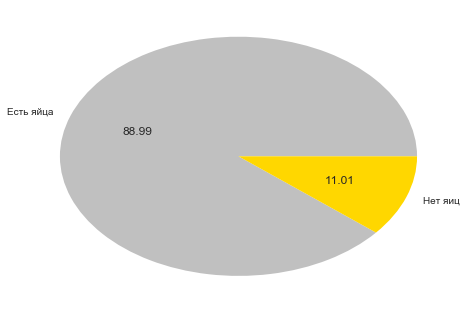

In [344]:
labels = ['Есть яйца', 'Нет яиц']
pokemon['has_eggs'] = pokemon['egg_group1_id'].apply(lambda x: 'no' if x == 15 else 'yes')

eggs_distr = pokemon['has_eggs'].value_counts()

plt.pie(eggs_distr, labels=labels, autopct='%.2f', colors=['silver', 'gold'])
plt.plot()
plt.show()

Мы видим, что у 11% покемонов **не бывает яиц**.

# Может ли покемон без яиц быть счастливым?
Исследуем этот вопрос, сравнив base_happiness покемонов с яйцами и покемонов без яиц.

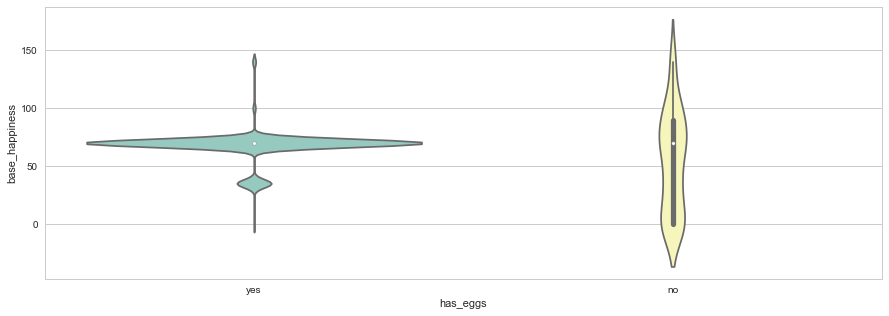

In [345]:
plt.subplots(figsize = (15,5))
sns.violinplot(x="has_eggs", y="base_happiness", data=pokemon, palette="Set3")
sns.plt.show()

Отсюда мы делаем **выводы**: 
* Наличие яиц упрощает жизнь покемона и практически гарантирует `base_happiness = 70`
* Отсутствие яиц снижает шансы покемона родиться таким же счастливым, как большинство покемонов

# Спасибо за внимание! :)